In [3]:
import glob 
import numpy as np 
import pandas as pd  

from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout  

import tensorflow as tf 
from tensorflow.keras.preprocessing.image import load_img, img_to_array 

import warnings
warnings.filterwarnings("ignore")


In [4]:
# this is an easy way of loading the image dataset

glob.glob('../input/intel-image-classification/seg_train/seg_train/*')

['../input/intel-image-classification/seg_train/seg_train/mountain',
 '../input/intel-image-classification/seg_train/seg_train/street',
 '../input/intel-image-classification/seg_train/seg_train/buildings',
 '../input/intel-image-classification/seg_train/seg_train/sea',
 '../input/intel-image-classification/seg_train/seg_train/forest',
 '../input/intel-image-classification/seg_train/seg_train/glacier']

In [5]:
# loading the image labels  

paths = glob.glob('../input/intel-image-classification/seg_train/seg_train/*')
l = len('../input/intel-image-classification/seg_train/seg_train/')
labels = []
for path in paths: 
    labels.append(path[l:]) 
    print(labels) 
    

['mountain']
['mountain', 'street']
['mountain', 'street', 'buildings']
['mountain', 'street', 'buildings', 'sea']
['mountain', 'street', 'buildings', 'sea', 'forest']
['mountain', 'street', 'buildings', 'sea', 'forest', 'glacier']


### ways to prepare the image data

In [6]:

def prepare_Dataset(path, label):  
    
    x_train = []
    y_train = [] 
    
    all_images_path = glob.glob(path+ '/*.jpg')  
    
    for img_path in all_images_path:  
        
        img = load_img(img_path, target_size=(150, 150)) 
        img = img_to_array(img) 
        img = img/255.0  
        
        x_train.append(img)
        y_train.append(label)  
        
    return np.array(x_train), np.array(y_train)     



In [7]:


trainX_building, trainY_building = prepare_Dataset("../input/intel-image-classification/seg_train/seg_train/buildings/", 0)  
trainX_forest, trainY_forest = prepare_Dataset("../input/intel-image-classification/seg_train/seg_train/forest/", 1)
trainX_glacier, trainY_glacier = prepare_Dataset("../input/intel-image-classification/seg_train/seg_train/glacier/", 2) 
trainX_mount, trainY_mount = prepare_Dataset("../input/intel-image-classification/seg_train/seg_train/mountain/", 3) 
trainX_sea, trainY_sea = prepare_Dataset("../input/intel-image-classification/seg_train/seg_train/sea/", 4) 
trainX_street, trainY_street = prepare_Dataset( "../input/intel-image-classification/seg_train/seg_train/street/" ,5)



In [9]:

print('train building shape', trainX_building.shape, trainY_building.shape)
print('train forest', trainX_forest.shape, trainY_forest.shape)
print('train glacier', trainX_glacier.shape, trainY_glacier.shape)
print('train mountain', trainX_mount.shape, trainY_mount.shape)
print('train sea', trainX_sea.shape, trainY_sea.shape)
print('train street', trainX_street.shape, trainY_street.shape) 


train building shape (2191, 150, 150, 3) (2191,)
train forest (2271, 150, 150, 3) (2271,)
train glacier (2404, 150, 150, 3) (2404,)
train mountain (2512, 150, 150, 3) (2512,)
train sea (2274, 150, 150, 3) (2274,)
train street (2382, 150, 150, 3) (2382,)


In [10]:
# concating all the data to form train and test
x_train = np.concatenate((trainX_building, trainX_forest, trainX_glacier, trainX_mount, trainX_sea, trainX_street), axis=0)
y_train = np.concatenate((trainY_building, trainY_forest, trainY_glacier, trainY_mount, trainY_sea, trainY_street), axis=0) 
print(x_train.shape)
print(y_train.shape)


(14034, 150, 150, 3)
(14034,)


In [11]:

testX_building, testY_building = prepare_Dataset("../input/intel-image-classification/seg_test/seg_test/buildings/", 0)
testX_forest, testY_forest = prepare_Dataset("../input/intel-image-classification/seg_test/seg_test/forest/", 1)
testX_glacier, testY_glacier = prepare_Dataset("../input/intel-image-classification/seg_test/seg_test/glacier/", 2)
testX_mount, testY_mount = prepare_Dataset("../input/intel-image-classification/seg_test/seg_test/mountain/", 3) 
testX_sea, testY_sea =  prepare_Dataset("../input/intel-image-classification/seg_test/seg_test/sea/", 4)  
testX_street, testY_street =  prepare_Dataset("../input/intel-image-classification/seg_test/seg_test/sea/", 5) 

x_test = np.concatenate((testX_building, testX_forest, testX_glacier, testX_mount, testX_sea, testX_street), axis=0) 
y_test = np.concatenate((testY_building, testY_forest, testY_glacier, testY_mount, testY_sea, testY_street), axis=0) 
 
print(x_test.shape)
print(y_test.shape) 



(3009, 150, 150, 3)
(3009,)


In [12]:

# train and test generators 
train_generator = ImageDataGenerator(rescale = 1./255)
train_data = train_generator.flow_from_directory('/kaggle/input/intel-image-classification/seg_train/seg_train', target_size=(64, 64), batch_size=32, class_mode='categorical', shuffle=True)



Found 14034 images belonging to 6 classes.


In [13]:
# the path for this is not correct
validation_generator = ImageDataGenerator(rescale=1./255) 
valid_generator = validation_generator.flow_from_directory('/kaggle/input/intel-image-classification/seg_train/seg_train',target_size=(64, 64), batch_size=32, class_mode='categorical', shuffle=True )


Found 14034 images belonging to 6 classes.


In [14]:
test_generator = ImageDataGenerator(rescale=1./255)
test_data = test_generator.flow_from_directory('/kaggle/input/intel-image-classification/seg_test/seg_test', target_size=(64, 64), batch_size=1, shuffle=False)


Found 3000 images belonging to 6 classes.


# InceptionV3 
InceptionV3 is a convolutional neural network architecture. This model comes from the Inception family. The goal of designing this models was to was to allow deeper networks while also keeping the number of parameters from growing too large. 

In the InceptionV3 particular elements such as Label Smoothing and the use of auxiliary classifier had major improvements. These two ( Label smoothing and auxiliary classifier ) are the main components of inception family architecture.  

In [16]:
# Inception V3  
from keras.models import Sequential
from keras.models import Model
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
from keras import optimizers, losses, activations, models
from keras.layers import Convolution2D, Dense, Input, Flatten, Dropout, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, Concatenate
from keras import applications

# WEIGHTS_PATH = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.5/inception_v3_weights_tf_dim_ordering_tf_kernels.h5'
# WEIGHTS_PATH_NO_TOP = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.5/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

WEIGHTS_PATH = '/kaggle/input/inceptionv3/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5' 
inception_v3 = '../input/keras-pretrained-models/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

base_model = tf.keras.applications.InceptionV3(input_shape = (150, 150, 3), include_top= False, weights=WEIGHTS_PATH)
base_model.trainble = True

for layer in base_model.layers:
     layer.trainable = False
    


## Data Augmentation 

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers.experimental import preprocessing 
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization, Dense, Dropout, GlobalAveragePooling2D, GlobalMaxPooling2D 
from tensorflow.keras import layers

image_augmentation = tf.keras.Sequential([
    preprocessing.RandomFlip('horizontal'), 
    preprocessing.RandomRotation(0.3), 
    preprocessing.RandomZoom(0.3),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    preprocessing.RandomContrast(0.2),
    preprocessing.Rescaling(1./255)
], name='data_augmentation') 


In [18]:


last_layer = base_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output


x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)                  
x = layers.Dense(6, activation='softmax')(x)           

model = Model(base_model.input, x)


last layer output shape:  (None, 7, 7, 768)


In [21]:
from tensorflow.keras.optimizers import RMSprop 

model.compile(optimizer = RMSprop(lr=0.0001), loss = 'sparse_categorical_crossentropy', metrics =['acc']) 
history = model.fit(x_train, y_train, epochs = 6 , validation_data=(x_test, y_test))

Epoch 1/6
439/439 [==============================] - 516s 1s/step - loss: 0.1804 - acc: 0.9384 - val_loss: 4.6724 - val_acc: 0.7311
Epoch 2/6
439/439 [==============================] - 487s 1s/step - loss: 0.1239 - acc: 0.9559 - val_loss: 4.4773 - val_acc: 0.7511
Epoch 3/6
439/439 [==============================] - 511s 1s/step - loss: 0.0987 - acc: 0.9680 - val_loss: 4.0713 - val_acc: 0.7328
Epoch 4/6
439/439 [==============================] - 511s 1s/step - loss: 0.0742 - acc: 0.9758 - val_loss: 4.8513 - val_acc: 0.7524
Epoch 5/6
439/439 [==============================] - 512s 1s/step - loss: 0.0635 - acc: 0.9815 - val_loss: 5.2173 - val_acc: 0.7504
Epoch 6/6
439/439 [==============================] - 506s 1s/step - loss: 0.0547 - acc: 0.9837 - val_loss: 7.6297 - val_acc: 0.7494


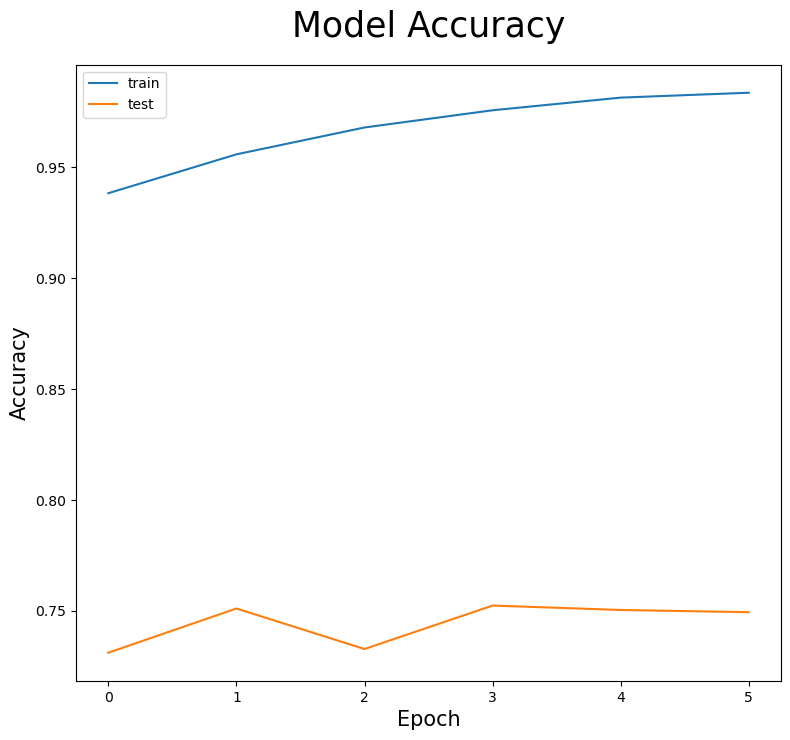

In [22]:
import matplotlib.pyplot as plt  

plt.figure(figsize=[20, 8]) 
plt.subplot(1, 2, 1) 

plt.plot(history.history['acc'])  
plt.plot(history.history['val_acc'])  

plt.title('Model Accuracy', size=25, pad=20)  

plt.ylabel('Accuracy', size=15) 
plt.xlabel('Epoch', size=15)

plt.legend(['train', 'test'], loc='upper left') 
plt.show() 



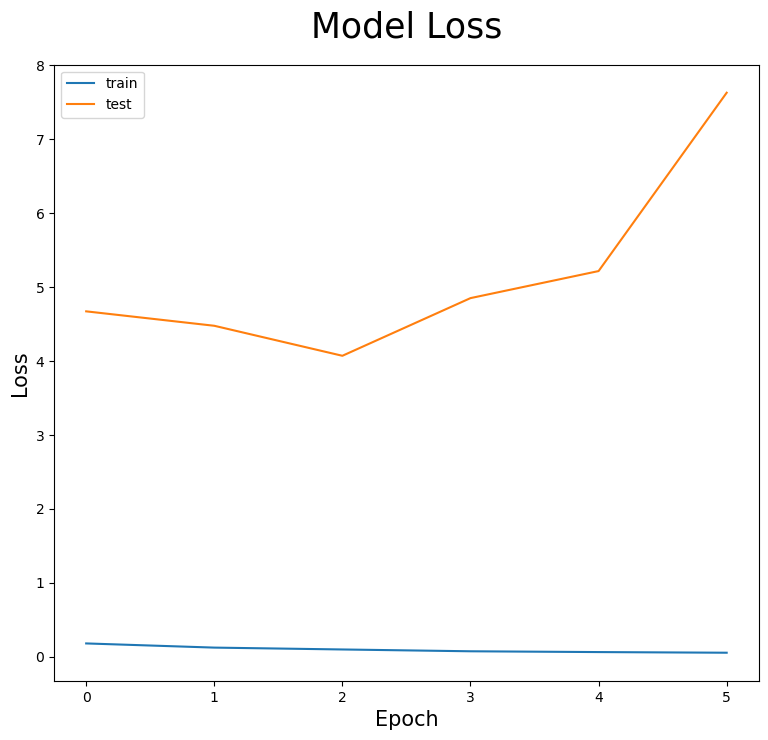

In [23]:
plt.figure(figsize=[20, 8]) 
plt.subplot(1, 2, 2) 

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])  

plt.title('Model Loss', size=25, pad=20) 
plt.ylabel('Loss', size=15)  

plt.xlabel('Epoch', size=15)  
plt.legend(['train', 'test'], loc='upper left') 

plt.show()


## ResNet50 Pretrained Model 

In [24]:
# Model parameters
BATCH_SIZE = 8
EPOCHS = 40
WARMUP_EPOCHS = 2
LEARNING_RATE = 1e-4
WARMUP_LEARNING_RATE = 1e-3
HEIGHT = 150
WIDTH = 150
CANAL = 3
N_CLASSES = 5
ES_PATIENCE = 5
RLROP_PATIENCE = 3
DECAY_DROP = 0.5 


In [25]:
batch_size = 32
num_classes = 6

This is another way of pre-processing the data and splitting the image dataset into train and test. 

In [26]:
# Resnet Train and Test 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
import os 

train_data_dir = '/kaggle/input/intel-image-classification/seg_train/seg_train' 

test_data_dir = '/kaggle/input/intel-image-classification/seg_test/seg_test' 

pred_data_dir = '/kaggle/input/intel-image-classification/seg_pred' 


# This normalize the pixel values
datagen = ImageDataGenerator(rescale =1./255)  


# this is another test and train generator right here

# this is the interesting part, splitting the image! 
train_generator_1 = datagen.flow_from_directory( 
    train_data_dir, 
    target_size=(150, 150), 
    batch_size = batch_size, 
    class_mode ='categorical',  
    shuffle = True
)

test_generator_1 = datagen.flow_from_directory( 
    test_data_dir, 
    target_size = (150, 150),
    batch_size = batch_size, 
    class_mode = 'categorical', 
    shuffle = False
)

pred_generator_1 = datagen.flow_from_directory(
    pred_data_dir, 
    target_size=(150, 150),
    batch_size = batch_size, 
    class_mode = None, 
    shuffle=False

)



Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.
Found 7301 images belonging to 1 classes.


In [29]:
# First a Simple Resnet Model  

from tensorflow.keras.applications import ResNet50  

resnet_weights_path = '../input/resnet50/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'
resnet = ResNet50('resnet_weights_path')

102967424/102967424 [==============================] - 1s 0us/step


In [30]:
# A more complicated version 

ResnetWeights = '/kaggle/input/resnet50/resnet50_weights_tf_dim_ordering_tf_kernels.h5' 

Res_Model = ResNet50(input_shape=(150, 150, 3), include_top=False)
 

def create_model(input_shape, n_out):  
    
    input_tensor = Input(shape=input_shape)
    
    base_model = ResNet50(weights=None, include_top= False, input_tensor=input_tensor) 
    
    base_model.load_weights('/kaggle/input/resnet50/resnet50_weights_tf_dim_ordering_tf_kernels.h5', by_name = True, skip_mismatch = True) 
    
    x = GlobalAveragePooling2D()(base_model.output)  
    
    x = Dropout(0.5)(x) 
    
    x = Dense(2048, activation='relu')(x) 
    
    x = Dropout(0.5)(x) 
    
    final_output = Dense(n_out, activation='softmax', name='final_output')(x) 
    
    model = Model(input_tensor, final_output)
    
    return model

94765736/94765736 [==============================] - 0s 0us/step


In [31]:

# Model parameters 

BATCH_SIZE = 8
EPOCHS = 40
WARMUP_EPOCHS = 2
LEARNING_RATE = 1e-4

WARMUP_LEARNING_RATE = 1e-3
HEIGHT = 320
WIDTH = 320
CANAL = 3

N_CLASSES = 5
ES_PATIENCE = 5
RLROP_PATIENCE = 3
DECAY_DROP = 0.5 


Resnet_model = create_model(input_shape=(HEIGHT, WIDTH, CANAL), n_out=6) 

for layer in Resnet_model.layers: 
    layer.trainable = False 
    
for i in range(-5, 0):
    Resnet_model.layers[i].trainable = True 
    
metrics_list = ["accuracy"]   
optimizer = optimizers.Adam(lr=WARMUP_LEARNING_RATE)  

Resnet_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=metrics_list) 
Resnet_model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 320, 320, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 326, 326, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 160, 160, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [32]:
print(train_generator)

In [34]:
# STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size 
# STEP_SIZE_VALID = test_generator.n//valid_generator.batch_size 

history_warmup = Resnet_model.fit(train_generator_1, epochs=5, verbose=1)



Epoch 1/5
439/439 [==============================] - 654s 1s/step - loss: 1.4653 - accuracy: 0.3945
Epoch 2/5
439/439 [==============================] - 643s 1s/step - loss: 1.4420 - accuracy: 0.4099
Epoch 3/5
439/439 [==============================] - 645s 1s/step - loss: 1.4355 - accuracy: 0.4094
Epoch 4/5
439/439 [==============================] - 642s 1s/step - loss: 1.4224 - accuracy: 0.4186
Epoch 5/5
439/439 [==============================] - 643s 1s/step - loss: 1.4119 - accuracy: 0.4230


In [35]:
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


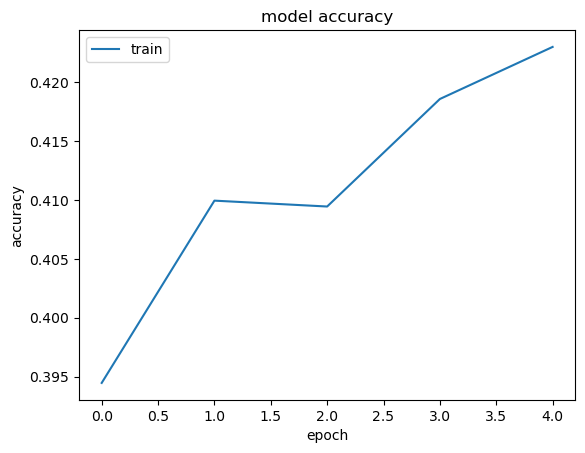

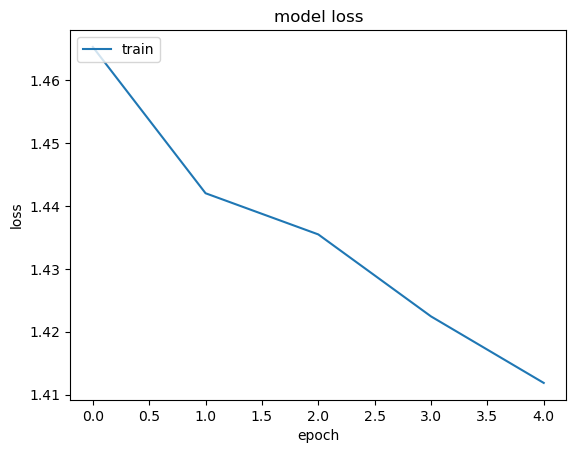

In [38]:

# summarize history for accuracy
plt.plot(history_warmup.history['accuracy'])


plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show() 

# summarize history for loss
plt.plot(history_warmup.history['loss'])


plt.title('model loss')
plt.ylabel('loss')

plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.show() 
